In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        
download('https://github.com/AllenDowney/AstronomicalData/raw/main/' + 'az-paper-twocol.mplstyle')
plt.style.use('./az-paper-twocol.mplstyle')

In [3]:
rocauc = pd.DataFrame(np.zeros((20,10)),columns=['0595','1090','1585','2080','2575','3070','3565','4060','4555','5050'])

for i in range(1,21):
    rocauc['0595'][i-1] = pd.read_csv('..\\traintestsplitresults\\0595_'+str(i)+'.csv')['ROC AUC'][0]
    rocauc['1090'][i-1] = pd.read_csv('..\\traintestsplitresults\\1090_'+str(i)+'.csv')['ROC AUC'][0]
    rocauc['1585'][i-1] = pd.read_csv('..\\traintestsplitresults\\1585_'+str(i)+'.csv')['ROC AUC'][0]
    rocauc['2080'][i-1] = pd.read_csv('..\\traintestsplitresults\\2080_'+str(i)+'.csv')['ROC AUC'][0]
    rocauc['2575'][i-1] = pd.read_csv('..\\traintestsplitresults\\2575_'+str(i)+'.csv')['ROC AUC'][0]
    rocauc['3070'][i-1] = pd.read_csv('..\\traintestsplitresults\\3070_'+str(i)+'.csv')['ROC AUC'][0]
    rocauc['3565'][i-1] = pd.read_csv('..\\traintestsplitresults\\3565_'+str(i)+'.csv')['ROC AUC'][0]
    rocauc['4060'][i-1] = pd.read_csv('..\\traintestsplitresults\\4060_'+str(i)+'.csv')['ROC AUC'][0]
    rocauc['5050'][i-1] = pd.read_csv('..\\traintestsplitresults\\5050_'+str(i)+'.csv')['ROC AUC'][0]
    rocauc['4555'][i-1] = pd.read_csv('..\\traintestsplitresults\\4555_'+str(i)+'.csv')['ROC AUC'][0]
print(rocauc)   

        0595      1090      1585      2080      2575      3070      3565  \
0   0.870659  0.896104  0.890274  0.888157  0.886892  0.879057  0.878189   
1   0.853183  0.877072  0.882128  0.887238  0.891605  0.898140  0.895250   
2   0.854167  0.863243  0.868264  0.868506  0.878194  0.888855  0.896255   
3   0.889984  0.913899  0.917915  0.904403  0.891333  0.886503  0.891142   
4   0.927814  0.919073  0.891734  0.895837  0.891782  0.896367  0.890589   
5   0.871300  0.892657  0.875171  0.869376  0.876129  0.875797  0.870473   
6   0.871462  0.863807  0.880255  0.866735  0.875430  0.881414  0.881175   
7   0.904906  0.916204  0.897001  0.886864  0.888926  0.890932  0.894873   
8   0.901301  0.914103  0.903203  0.903829  0.898219  0.908833  0.909566   
9   0.837159  0.878077  0.871845  0.885236  0.893017  0.898663  0.892803   
10  0.890443  0.891142  0.904528  0.886532  0.873771  0.883564  0.883216   
11  0.900765  0.874725  0.862264  0.876511  0.884232  0.877040  0.886765   
12  0.873913

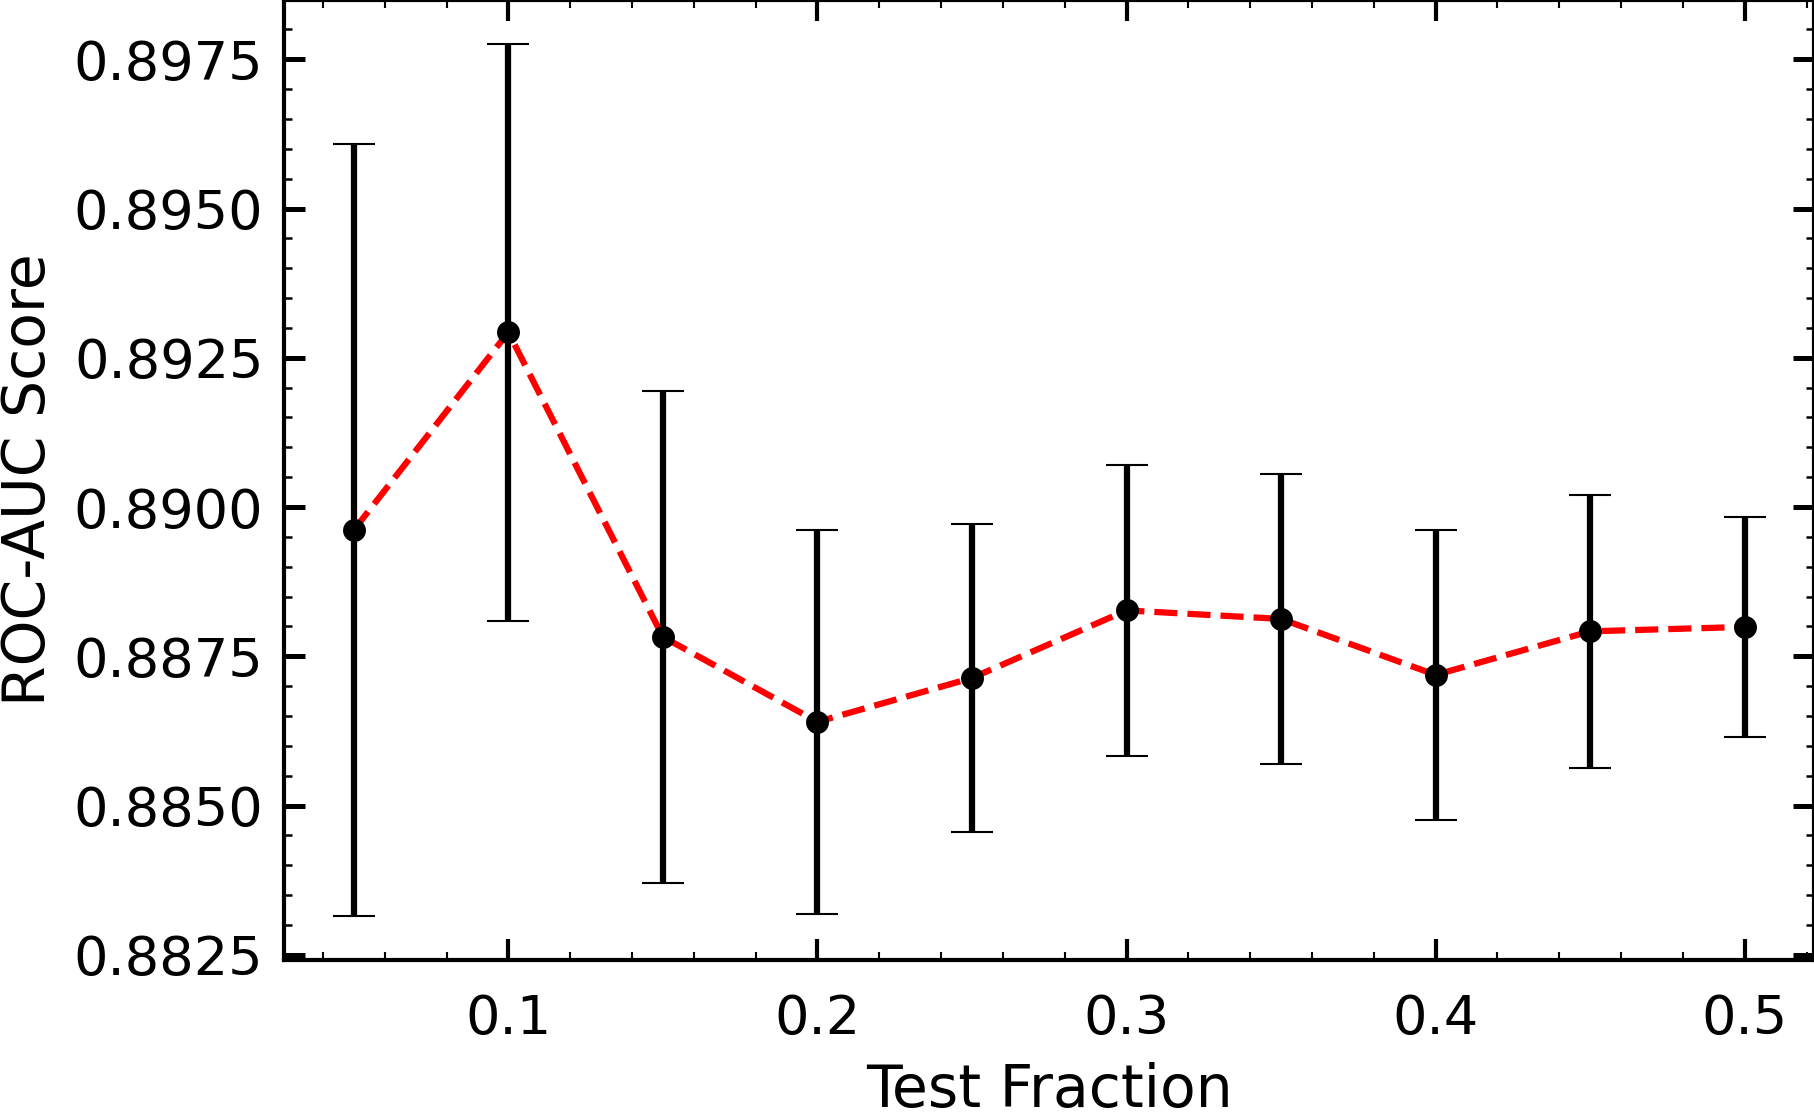

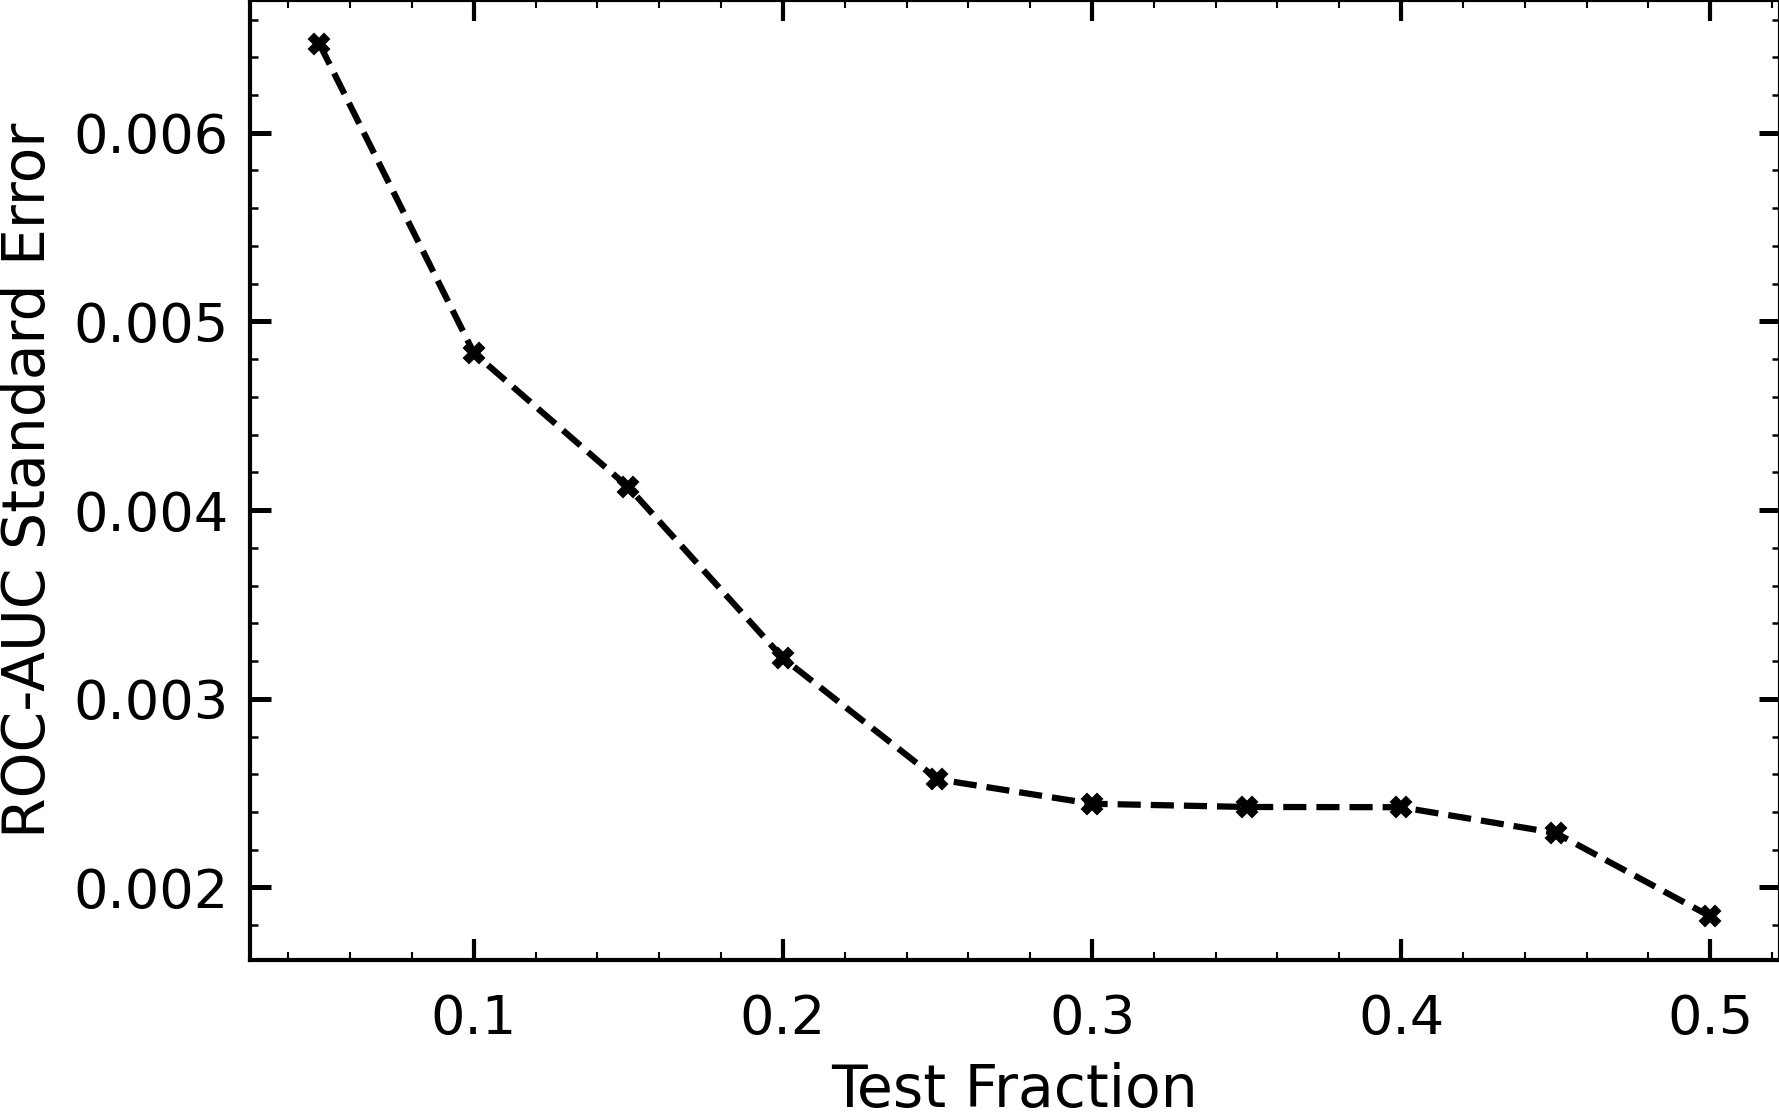

In [23]:
fig, ax = plt.subplots(figsize=(6,4),dpi=300)
fig1, ax1 = plt.subplots(figsize=(6,4),dpi=300)

ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)
ax1.xaxis.set_tick_params(labelsize=13)
ax1.yaxis.set_tick_params(labelsize=13)

ax.errorbar([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5],rocauc.mean(),yerr=rocauc.sem(),capsize=5,fmt='o')
ax.plot([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5],rocauc.mean(),linestyle='dashed',color='red')
ax.set_xlabel('Test Fraction',fontsize=14)
ax.set_ylabel('ROC-AUC Score',fontsize=14)
ax1.set_xlabel('Test Fraction',fontsize=14)
ax1.set_ylabel('ROC-AUC Standard Error',fontsize=14)
ax1.plot([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5],rocauc.sem(),linestyle='dashed',marker='X')